In [114]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [115]:
plt.rc ('font', size = 10) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 10) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 10) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 10) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 10) #Schriftgröße der Legende

In [116]:
def gaus1(x,m,s,scale):
    return scale*1/(s**2*2*np.pi)**0.5 * math.e**(-(x-m)**2/(2.*s**2))
def gaus2(x,m1,m2,s1,s2,scale1,scale2):
    return scale1*1/(s1**2*2*np.pi)**0.5 * math.e**(-(x-m1)**2/(2.*s1**2))+ scale2*1/(s2**2*2*np.pi)**0.5 * math.e**(-(x-m2)**2/(2.*s2**2))
def gaus3(x,m1,m2,m3,s1,s2,s3,scale1,scale2,scale3):
    return scale1*1/(s1**2*2*np.pi)**0.5 * math.e**(-(x-m1)**2/(2.*s1**2))+ scale2*1/(s2**2*2*np.pi)**0.5 * math.e**(-(x-m2)**2/(2.*s2**2))+scale3*1/(s3**2*2*np.pi)**0.5 * math.e**(-(x-m3)**2/(2.*s3**2))

In [117]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

FitFunktionen

In [118]:
def gaus1fit(von,bis,path,m=1,mmin=0,mmax=2,s=0.2,smax=1000,scale=1e-9,override=False): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus = lmfit.models.GaussianModel()  
    pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["sigma"].set(value=1,min=0)
        pars_gaus["amplitude"].set(value=1,min=0)



    # if s != 1 or smax != 1000:
    #     pars_gaus["s"].set(value=s,min=0,max=smax)
    # if scale != 1:
    #     pars_gaus["scale"].set(value=scale,min=0)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


def gaus2fit(m1,m1min,m1max,m2,m2min,m2max,von,bis,path,override=False): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus=lmfit.models.GaussianModel(prefix="g1_")+lmfit.models.GaussianModel(prefix="g2_")

    def guess(data,x):
        params_g1=lmfit.models.GaussianModel(prefix="g1_").guess(data,x)
        params=model_gaus.make_params()
        for i in params_g1:
            params[i]=params_g1[i]
                    
        params["g2_center"].value=params.get("g1_center").value-1
        params["g2_sigma"].value=params.get("g1_sigma").value*0.5
        params["g2_amplitude"].value=params.get("g1_amplitude").value*0.3
        return params
    model_gaus.guess=guess
    pars_gaus = model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["g1_center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["g1_sigma"].set(value=1,min=0)
        pars_gaus["g1_amplitude"].set(value=1,min=0)
        pars_gaus["g2_center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["g2_sigma"].set(value=1,min=0)
        pars_gaus["g2_amplitude"].set(value=1,min=0)

    # if override:
    #     #pars_gaus = model_gaus.make_params()
    #     pars_gaus["m"].set(value=m,min=mmin,max=mmax)
    #     pars_gaus["s"].set(value=1,min=0)
    #     pars_gaus["scale"].set(value=1,min=0)

    # pars_gaus["m1"].set(value=m1,min=m1min,max=m1max)
    # pars_gaus["s1"].set(value=1,min=0)
    # pars_gaus["scale1"].set(value=1,min=0)

    # pars_gaus["m2"].set(value=m2,min=m2min,max=m2max)
    # pars_gaus["s2"].set(value=1,min=0)
    # pars_gaus["scale2"].set(value=1,min=0)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())

def gaus3fit(m1,m1min,m1max,m2,m2min,m2max,m3,m3min,m3max,von,bis,path):

    model_gaus = lmfit.model.Model(gaus3)  
    pars_gaus = model_gaus.make_params()
    pars_gaus["m1"].set(value=m1,min=m1min,max=m1max)
    pars_gaus["s1"].set(value=1,min=0)
    pars_gaus["scale1"].set(value=1,min=0)

    pars_gaus["m2"].set(value=m2,min=m2min,max=m2max)
    pars_gaus["s2"].set(value=1)
    pars_gaus["scale2"].set(value=1)

    pars_gaus["m3"].set(value=m3,min=m3min,max=m3max)
    pars_gaus["s3"].set(value=1,min=0)
    pars_gaus["scale3"].set(value=1,min=0)

    vonarr = pos(von)
    bisarr = pos(bis)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


Daten einlesen und Standartfehler as Fehler der Counts festlegen

<ErrorbarContainer object of 3 artists>

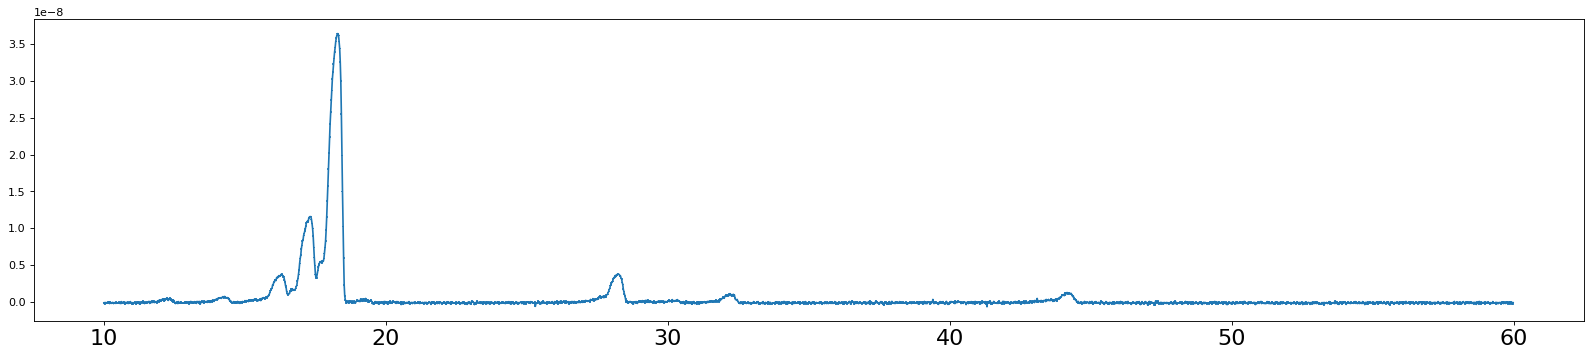

In [119]:

with open('Data/Restgas_3.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = 1e-10#(data[1,i])*0.3
data = np.vstack([data,err])

v = pos(10)
b = pos(60)
fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0,v:b],data[1,v:b],yerr=data[2,v:b],label = 'Data')


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 35
    # variables        = 3
    chi-square         = 37.1554123
    reduced chi-square = 1.16110663
    Akaike info crit   = 8.09164851
    Bayesian info crit = 12.7576927
[[Variables]]
    amplitude:  1.7886e-10 +/- 1.6583e-11 (9.27%) (init = 4.837486e-10)
    center:     12.2364666 +/- 0.01772971 (0.14%) (init = 12.23111)
    sigma:      0.17250079 +/- 0.01977388 (11.46%) (init = 0.24)
    fwhm:       0.40620830 +/- 0.04656393 (11.46%) == '2.3548200*sigma'
    height:     4.1366e-10 +/- 3.4920e-11 (8.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.687
    C(center, sigma)     = 0.217
    C(amplitude, center) = 0.183


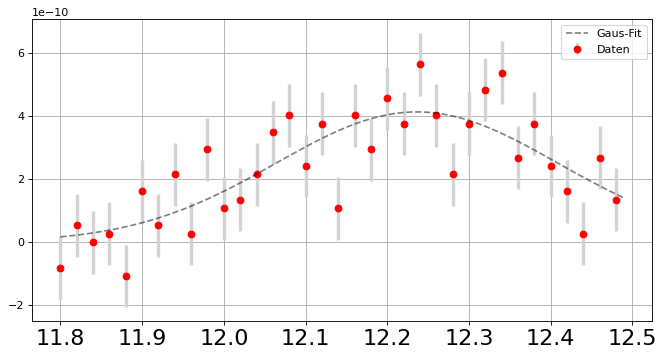

In [120]:
gaus1fit(11.8,12.5,'Restgas_3_12.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 55
    # variables        = 3
    chi-square         = 54.9245807
    reduced chi-square = 1.05624194
    Akaike info crit   = 5.92452895
    Bayesian info crit = 11.9465285
[[Variables]]
    amplitude:  3.1049e-10 +/- 1.4519e-11 (4.68%) (init = 6.385478e-10)
    center:     14.2092266 +/- 0.00967276 (0.07%) (init = 14.2075)
    sigma:      0.18091361 +/- 0.00995780 (5.50%) (init = 0.24)
    fwhm:       0.42601900 +/- 0.02344882 (5.50%) == '2.3548200*sigma'
    height:     6.8469e-10 +/- 3.1698e-11 (4.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.597


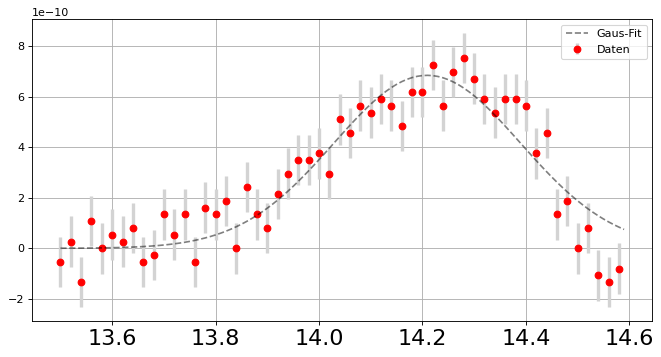

In [121]:
gaus1fit(13.5,14.6,'test')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 37
    # variables        = 3
    chi-square         = 155.410512
    reduced chi-square = 4.57089741
    Akaike info crit   = 59.1006302
    Bayesian info crit = 63.9333839
[[Variables]]
    amplitude:  2.1721e-09 +/- 4.7533e-11 (2.19%) (init = 2.22524e-09)
    center:     16.2281395 +/- 0.00544329 (0.03%) (init = 16.21)
    sigma:      0.23475326 +/- 0.00645148 (2.75%) (init = 0.23)
    fwhm:       0.55280167 +/- 0.01519207 (2.75%) == '2.3548200*sigma'
    height:     3.6913e-09 +/- 6.1210e-11 (1.66%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.797
    C(center, sigma)     = 0.421
    C(amplitude, center) = 0.407


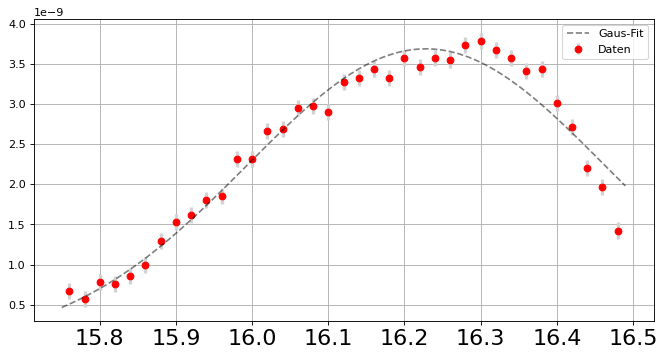

In [122]:
gaus1fit(15.75,16.5,'test')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 2605.50963
    reduced chi-square = 55.4363751
    Akaike info crit   = 203.668028
    Bayesian info crit = 209.404097
[[Variables]]
    amplitude:  6.8660e-09 +/- 1.7111e-10 (2.49%) (init = 7.324771e-09)
    center:     17.2424645 +/- 0.00668670 (0.04%) (init = 17.21)
    sigma:      0.24110770 +/- 0.00730528 (3.03%) (init = 0.23)
    fwhm:       0.56776524 +/- 0.01720263 (3.03%) == '2.3548200*sigma'
    height:     1.1361e-08 +/- 2.0654e-10 (1.82%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.800
    C(center, sigma)     = 0.507
    C(amplitude, center) = 0.494


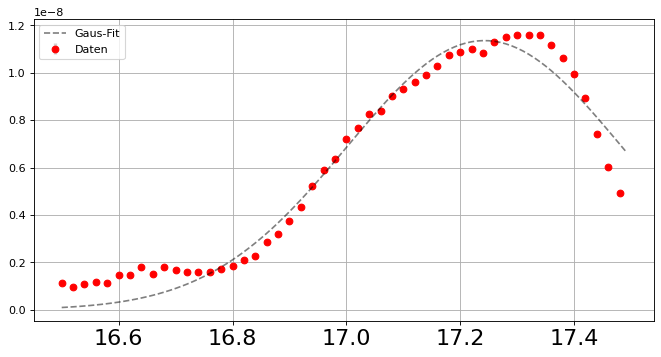

In [123]:
gaus1fit(16.5,17.5,'test')

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 383
    # data points      = 125
    # variables        = 6
    chi-square         = 28316.4352
    reduced chi-square = 237.953237
    Akaike info crit   = 689.860491
    Bayesian info crit = 706.830373
[[Variables]]
    g1_amplitude:  4.2388e-09 +/- 9.3888e-10 (22.15%) (init = 2.533068e-08)
    g1_center:     18.3492266 +/- 0.00416588 (0.02%) (init = 18.21)
    g1_sigma:      0.08276891 +/- 0.00793759 (9.59%) (init = 0.23)
    g2_amplitude:  1.3928e-08 +/- 1.0348e-09 (7.43%) (init = 7.599203e-09)
    g2_center:     18.1389571 +/- 0.01534702 (0.08%) (init = 17.21)
    g2_sigma:      0.18050436 +/- 0.00860946 (4.77%) (init = 0.115)
    g1_fwhm:       0.19490588 +/- 0.01869159 (9.59%) == '2.3548200*g1_sigma'
    g1_height:     2.0431e-08 +/- 2.7970e-09 (13.69%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_fwhm:       0.4250

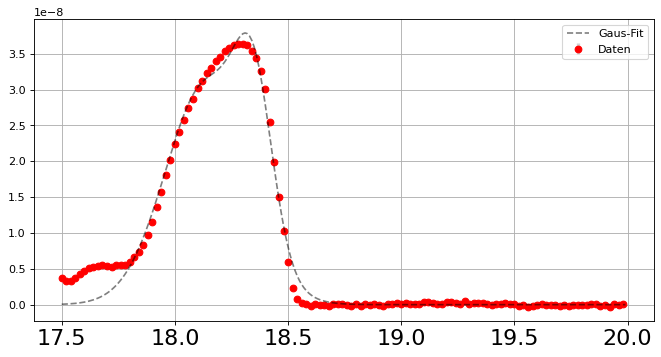

In [129]:
gaus2fit(1,1,1,1,1,1,17.5,20,'test')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 37
    # variables        = 3
    chi-square         = 20130.9012
    reduced chi-square = 592.085330
    Akaike info crit   = 239.066455
    Bayesian info crit = 243.899209
[[Variables]]
    amplitude:  1.9838e-08 +/- 4.7251e-10 (2.38%) (init = 1.94878e-08)
    center:     18.2260342 +/- 0.00553959 (0.03%) (init = 18.21)
    sigma:      0.21496908 +/- 0.00642318 (2.99%) (init = 0.21)
    fwhm:       0.50621348 +/- 0.01512544 (2.99%) == '2.3548200*sigma'
    height:     3.6816e-08 +/- 7.1929e-10 (1.95%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.758
    C(center, sigma)     = 0.351
    C(amplitude, center) = 0.326


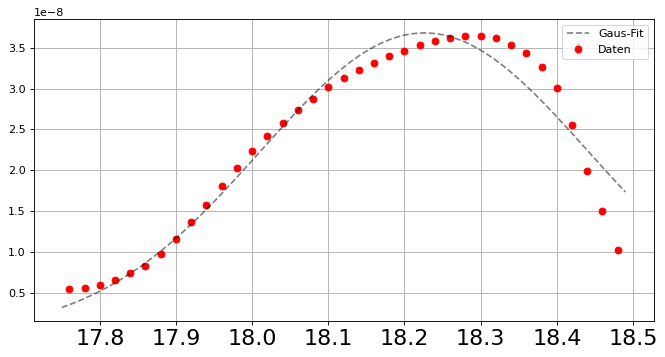

In [128]:
gaus1fit(17.75,18.5,'test')